In [1]:
import pandas as pd
import os.path
import matplotlib.pyplot as plt

%matplotlib inline

nepr_file = os.path.join('podatki/obdelani_podatki', 'nepremicnine_1.csv')
nepr_z_dvojniki = pd.read_csv(nepr_file)#, index_col = 'id')

Preden sem začel z delom sem opazil, da se nekateri oglasi ponovijo v več regijah. Ni nobene logike, kateri se ponovijo in kolikokrat, zato jih preprosto izpustim (takih je le okoli 50, ni škode za celoten vzorec).

In [2]:
pd.concat(g for _, g in nepr_z_dvojniki.groupby("id") if len(g) > 1)

,regija,id,ime_oglasa,vrsta_nepremicnine,tip_nepremicnine,zemljisce,velikost,cena,agencija,leto
586,dolenjska,5787946,"RAKEK, 2 KM OD IZVOZA AC UNEC",Hiša,NaN,270.0,94.0,83000.0,Zasebna ponudba,2010.0
2547,gorenjska,5787946,"RAKEK, 2 KM OD IZVOZA AC UNEC",Hiša,NaN,270.0,94.0,83000.0,Zasebna ponudba,2010.0
4518,koroska,5787946,"RAKEK, 2 KM OD IZVOZA AC UNEC",Hiša,NaN,270.0,94.0,83000.0,Zasebna ponudba,2010.0
5297,ljubljana mesto,5787946,"RAKEK, 2 KM OD IZVOZA AC UNEC",Hiša,NaN,270.0,94.0,83000.0,Zasebna ponudba,2010.0
6178,ljubljana mesto,5787946,"RAKEK, 2 KM OD IZVOZA AC UNEC",Hiša,NaN,270.0,94.0,83000.0,Zasebna ponudba,2010.0
...,...,...,...,...,...,...,...,...,...,...
15360,savinjska,5883962,"LJ. BEŽIGRAD, GLAVARJEVA ULICA",Stanovanje,NaN,NaN,42.0,NaN,D5 invest d.o.o.,1977.0
15673,savinjska,5883962,"LJ. BEŽIGRAD, GLAVARJEVA ULICA",Stanovanje,NaN,NaN,42.0,NaN,D5 invest d.o.o.,1977.0
16118,severna primorska,5883962,"LJ. BEŽIGRAD, GLAVARJEVA ULICA",Stanovanje,NaN,NaN,42.0,NaN,D5 invest d.o.o.,1977.0
16319,severna primorska,5883962,"LJ. BEŽIGRAD, GLAVARJEVA ULICA",Stanovanje,NaN,NaN,42.0,NaN,D5 invest d.o.o.,1977.0


In [25]:
nepr_brez_dvojnikov = nepr_z_dvojniki.drop_duplicates('id')

nepr = nepr_brez_dvojnikov.set_index('id')

nepr['cena_m2'] = nepr['cena'] / nepr['velikost']

In [23]:
nepr

,regija,ime_oglasa,vrsta_nepremicnine,tip_nepremicnine,zemljisce,velikost,cena,agencija,leto,cena_m2
id,,,,,,,,,,
6366667,dolenjska,MILIČI,Hiša,Samostojna,75074.0,103.00,63000.0,STANART d.o.o.,1954.0,611.650485
6367917,dolenjska,NOVO MESTO,Poslovni prostor,Gostinski lokal,671.0,107.40,190000.0,NNRN nepremičnine d.o.o. Novo mesto,1975.0,1769.087523
6371197,dolenjska,"NOVO MESTO, BUČNA VAS",Hiša,Samostojna,533.0,119.55,263533.0,"Oridom nepremičnine, Ivan Orešnik s.p.",2020.0,2204.374739
6367270,dolenjska,"TREBNJE, ŠTEFAN PRI TREBNJEM",Stanovanje,dvoinpolsobno,NaN,78.60,157000.0,"Ažur Trading, d.o.o.",2019.0,1997.455471
6292502,dolenjska,VELIKI GABER,Hiša,Samostojna,522.0,240.00,295000.0,Soseska Gaber d.o.o.,2019.0,1229.166667
...,...,...,...,...,...,...,...,...,...,...
6183700,zasavska,"ZAGORJE OB SAVI, MESTO",Posest,Zazidljiva,NaN,3446.00,99934.0,"MA - nepremičninska družba, Marko Alič s.p.",NaN,29.000000
6329331,zasavska,"ZAGORJE OB SAVI, OKROGARJEVA KOLONIJA",Posest,Zazidljiva,NaN,4173.00,66768.0,NeSta d.o.o.,NaN,16.000000
6315241,zasavska,"ZAGORJE OB SAVI, PODVINE 47",Posest,Zazidljiva,NaN,3954.00,54000.0,Zasebna ponudba,NaN,13.657056


In [5]:
brez_posesti = nepr[nepr.vrsta_nepremicnine != 'Posest']

<AxesSubplot:xlabel='regija'>

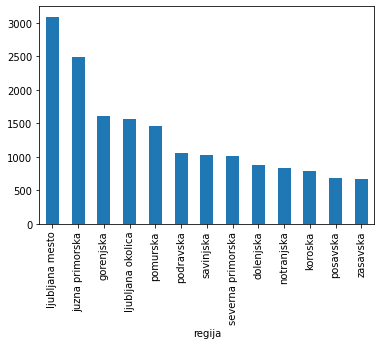

In [6]:
po_regijah = brez_posesti.groupby('regija').mean('cena_m2').sort_values('cena_m2', ascending = False)[['cena_m2']]
po_regijah
po_regijah.cena_m2.plot.bar()

In [7]:
grupiran = brez_posesti[(brez_posesti.leto >= 1980) & (brez_posesti.cena_m2 <= 10000)].groupby(["leto"])

In [8]:
letna_povprecja = brez_posesti[(brez_posesti.leto >= 1980) & (brez_posesti.cena_m2 >= 1)& (brez_posesti.cena_m2 <= 10000)].groupby(["regija","leto"]).mean('cena_m2')
#letna_povprecja = letna_povprecja[['cena_m2']]

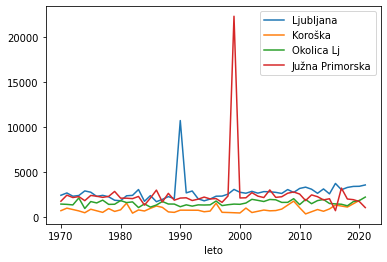

In [9]:

brez_posesti[(brez_posesti.regija == "ljubljana mesto") & (brez_posesti.leto >= 1970)].groupby("leto").mean('cena_m2').sort_values('leto').cena_m2.plot.line()
brez_posesti[(brez_posesti.regija == "koroska") & (brez_posesti.leto >= 1970)].groupby("leto").mean('cena_m2').sort_values('leto').cena_m2.plot.line()
brez_posesti[(brez_posesti.regija == "ljubljana okolica") & (brez_posesti.leto >= 1970)].groupby("leto").mean('cena_m2').sort_values('leto').cena_m2.plot.line()
ax = brez_posesti[(brez_posesti.regija == "juzna primorska") & (brez_posesti.leto >= 1970)].groupby("leto").mean('cena_m2').sort_values('leto').cena_m2.plot.line()
ax.legend(["Ljubljana", "Koroška", "Okolica Lj","Južna Primorska"])



In [10]:
vrste = nepr.groupby('vrsta_nepremicnine')
vrste.size()

vrsta_nepremicnine
Garaža                121
Hiša                 5107
Posest               5071
Poslovni prostor     2095
Počitniški objekt     177
Stanovanje           3361
Vikend                518
dtype: int64

<AxesSubplot:xlabel='vrsta_nepremicnine'>

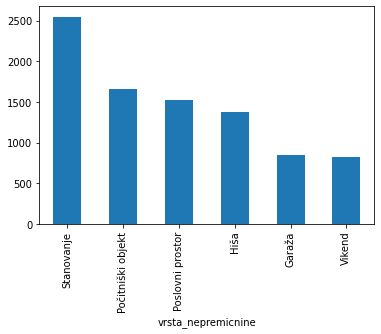

In [11]:
brez_posesti.groupby('vrsta_nepremicnine').mean('cena_m2').sort_values('cena_m2',ascending = False).cena_m2.plot.bar()

<AxesSubplot:xlabel='tip_nepremicnine'>

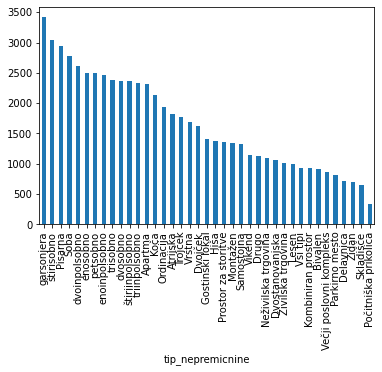

In [12]:
brez_posesti.groupby('tip_nepremicnine').mean('cena_m2').sort_values('cena_m2',ascending = False).cena_m2.plot.bar()

In [13]:
posesti = nepr[(nepr.vrsta_nepremicnine == "Posest") & (nepr.cena_m2 < 1000) ]

posesti.sort_values('cena', ascending = True).head(1500)
#posesti.groupby('regija').mean('cena').sort_values('cena', ascending = False).cena.plot.bar()

,regija,id,ime_oglasa,vrsta_nepremicnine,tip_nepremicnine,zemljisce,velikost,cena,agencija,leto,cena_m2
495,dolenjska,5796514,"CELJE, TEHARJE",Posest,NaN,NaN,1010.0,95.0,Borza nepremičnin d.o.o.,NaN,0.094059
7561,ljubljana okolica,6370742,"MEDVODE, PRESKA",Posest,Zazidljiva,NaN,6225.0,100.8,Občina Medvode,NaN,0.016193
2620,juzna primorska,6294567,"GRIŽE, SEŽANA OKOLICA - JERIŠI",Posest,Kmetijsko zemljišče,NaN,741.0,370.5,"Ruj nepremičnine, Jernej Suša, s.p.",NaN,0.500000
2595,juzna primorska,6193207,GORNJE VREME,Posest,Kmetijsko zemljišče,NaN,1190.0,600.0,"Ruj Nepremičnine, Jernej Suša, s.p.",NaN,0.504202
7838,ljubljana okolica,6276142,GROSUPLJE,Posest,Drugo,NaN,5.0,750.0,Zasebna ponudba,NaN,150.000000
...,...,...,...,...,...,...,...,...,...,...,...
15354,savinjska,6209585,SPODNJE NEGONJE,Posest,Zazidljiva,NaN,919.0,35000.0,"Agenti nepremičninsko posredovanje, d.o.o.",NaN,38.084875
1860,gorenjska,6205014,PLANINA POD GOLICO,Posest,Zazidljiva,NaN,779.0,35000.0,"Aeon nepremičnine, d.o.o.",NaN,44.929397
14918,savinjska,6336600,NOVA CERKEV,Posest,Zazidljiva,NaN,700.0,35000.0,Blok d.o.o.,NaN,50.000000
9256,ljubljana okolica,6342444,ČAGOŠČE,Posest,Zazidljiva,NaN,800.0,35000.0,KU-MI nepremičnine d.o.o.,NaN,43.750000
